<h1 align="center">Creating a Baseline Model using Naive Forecasting (Hourly Forecasting)</h1>
<br>
The next step is to create a baseline model with very simple time series forecasting, otherwise known as a Naive model
<br>
This notebook will be predicting hourly consumption as opposed to daily consumption

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import naive_model as nm
%load_ext autoreload
%autoreload 2

In [50]:
# reading in the data
filename = 'final_hourly.csv'
data = nm.read_csv(filename)

data.head(3)

,global_active_power
datetime,
2006-12-18 00:00:00,16.582
2006-12-18 01:00:00,18.798
2006-12-18 02:00:00,17.068


In [59]:
# creating a training and testing split of the data
train, test = nm.train_test_split(data.values)
# retrieving the shape of the dataset
print(train.shape, test.shape)
print('\nThere are {} weeks in the training set \nThere are {} weeks in the testing set'
     .format((int(train.shape[0]/7)), int((test.shape[0]/7))))

(1140, 24, 1) (285, 24, 1)

There are 162 weeks in the training set 
There are 40 weeks in the testing set


In [61]:
# assigning functions to a dictionary of models
models = dict()
models['daily'] = nm.daily_persistence
models['weekly'] = nm.weekly_persistence
models['week-oya'] = nm.weekly_oya_persistence

week-oya: [49.692] 35.7, 31.9, 27.1, 23.8, 23.0, 22.9, 29.4, 48.9, 44.5, 46.9, 48.8, 55.5, 59.5, 57.8, 57.5, 55.1, 53.6, 53.1, 58.8, 66.2, 68.8, 67.5, 59.9, 45.9
daily: [47.175] 37.2, 29.9, 28.6, 24.4, 22.5, 23.2, 28.9, 53.3, 46.7, 45.1, 45.0, 52.5, 55.8, 50.8, 56.5, 53.1, 47.2, 52.2, 55.0, 57.0, 62.1, 64.5, 53.5, 46.8
weekly: [50.871] 40.5, 32.6, 28.9, 25.0, 23.6, 25.3, 28.6, 54.2, 48.3, 48.5, 51.7, 58.5, 60.5, 54.8, 60.7, 55.7, 47.3, 57.0, 61.5, 65.4, 69.0, 70.8, 55.4, 48.6


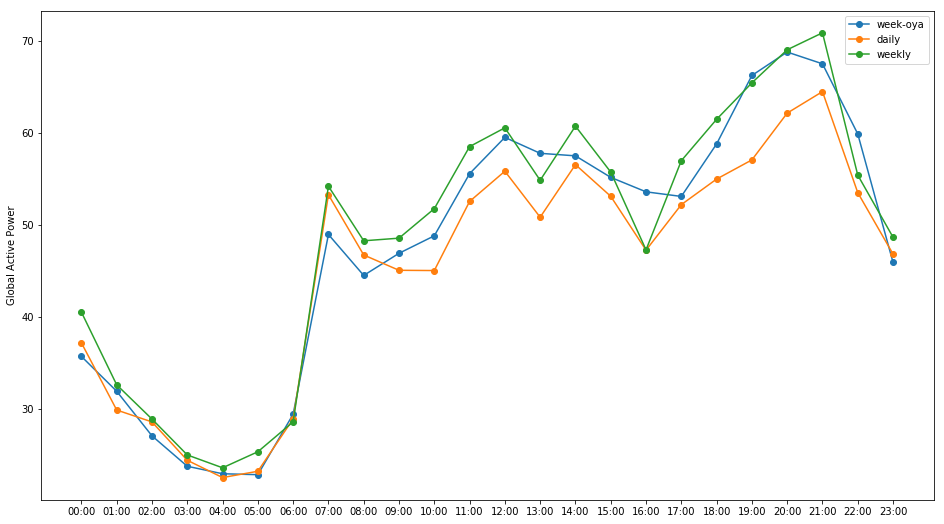

In [68]:
# using a combination of functions I created, I was able to create an evaluation model and produce these visualisations
nm.scores_and_visualisations(models, train, test)

Naive model indicates similar predictions for this time period for daily, weekly and weekly-oya

Our evaluation metric of Mean Squared error is also fairly similar across all three models